# Actividad 2 Curso 4: Aplicaciones en Ciencias de Datos e Inteligencia Artificial
Autores: Sebastian, Moisés Marquina y Dora Novoa

### 2.1 Solución cerrada de regresión lineal
5 ptos Abrir entorno de programación, de preferencia utilizar Visual Studio Code, Google Colaba o Jupyter
Notebook. 

5 ptos Utilizando Numpy o Scipy genere 1,000 datos que distribuyan uniforme entre 0 y 3, U(0, 3). Este
arreglo representará su variable independiente, tambión denominado a lo largo de este curso como
feature, descriptor o input.

El método de np.random.uniform esta en la documentacio de [numpay.org](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.uniform.html)

5 ptos A través de la misma librería genere los 1,000 datos de la variable dependiente, también conocida
como target u output, de la siguiente forma y = 5 + 2x + U(2, 4)

5 ptos Por medio de matplotlib o seaborn genere un gráfico de dispersión (scatter plot) entre la variable
dependiente y la variable independiente. Ajuste título, nombre de ejes, tamaño de los valores en
los ejes, tamaño de la figura, colores de los y la transparencia de los puntos.

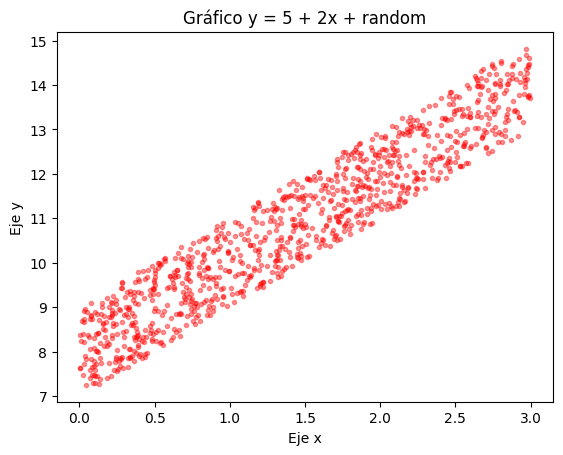

In [29]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

plt.plot(X, Y, '.', color='red', alpha=0.4)
plt.title("Gráfico y = 5 + 2x + random")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()
  



5 ptos Genere una función que permita visualizar los datos simulados. Esta función debe recibir como
argumentos la variable dependiente y, la variable independiente x y el número de datos a simular.
La función debe permitir visualizar o guardar la imagen.

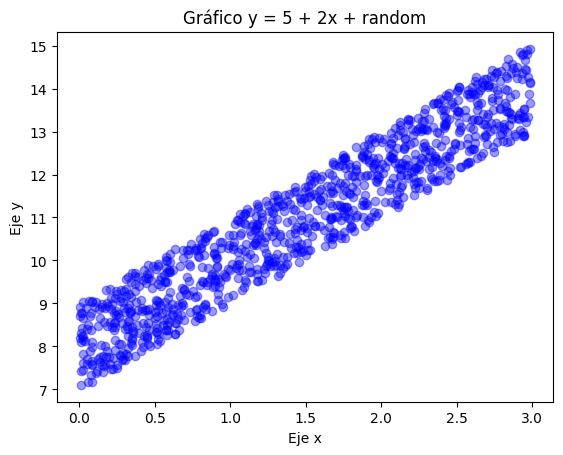

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def visualizar_datos(x, y, num_datos=1000):
    x = np.random.uniform(0,3, size=num_datos)
    y = 5 + 2*x + np.random.uniform(2,4,num_datos)

    plt.scatter(x, y, color='blue', alpha=0.4)
    plt.title("Gráfico y = 5 + 2x + random")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.show()
  
visualizar_datos(X, Y, 1000)

5 ptos Aplique las operaciones matriciales necesarias para ajustar una regresión lineal a través de su
solución cerrada (use numpy.linalg). Cree una función que reciba la variable dependiente y la
variable independiente, esta función debe retornar los parámetros optimizados.



In [31]:
import numpy as np
x = np.random.uniform(0,3, size=1000)
y = 5 + 2*X + np.random.uniform(2,4,1000)
X = x.reshape(-1, 1) # se cambia a matriz de una sola columna

def ajustar_regresion(X, y):
    X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
    # ajuste = (X^T * X)^-1 * X^T * y
    ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(y)
    return ajuste
ajuste = ajustar_regresion(X, y)
# el ajuste será los coeficientes de la ecuación de la recta  (intercepto y pendiente), así: y = ajuste[0] + ajuste[1]*x   
# print(ajuste)


5 ptos Utilizando Matplotlib o seaborn genere un gráfico que incluya la solución (recta óptima) y
los datos utilizados. Cree una función que reciba x, y y los parámetros óptimos y cree dicha
visualización.

Para la generación de la línea X usamos el np.linspace en la documentación [numpy.org ver aquí](https://numpy.org/doc/2.0/reference/generated/numpy.linspace.html#numpy-linspace)

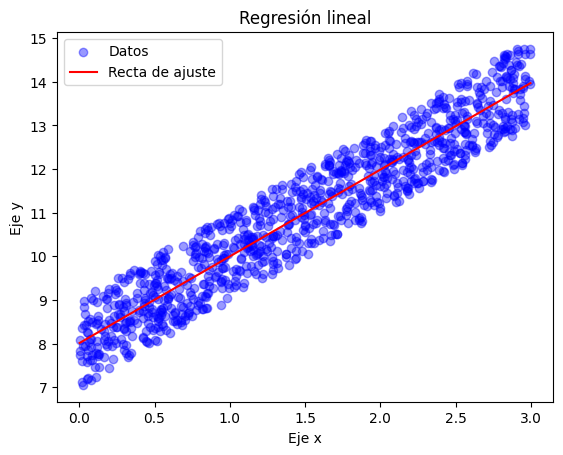

In [32]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

def ajustar_regresion(x, y):
    X = x.reshape(-1, 1) # se cambia a matriz de una sola columna
    X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
    # ajuste = (X^T * X)^-1 * X^T * y
    ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(y)
    return ajuste

# el ajuste será los coeficientes de la ecuación de la recta  (intercepto y pendiente), así: y = ajuste[0] + ajuste[1]*x   
ajuste = ajustar_regresion(X, Y)

def graficar_recta_ajuste(x, y, ajuste):
    # np.linspace(inicio, fin, num_puntos_generar)   genera un número entre un valor inicial y un valor final. Para esto toma el valor de el arreglo x mínimo y máximo para seguir con la recta
    x_lin = np.linspace(x.min(), x.max(), 100) # Crear valores de X para la recta de ajuste
    y_lin = ajuste[0] + ajuste[1] * x_lin  # Calcular los valores de Y para la recta de ajuste con y = mx + b
    
    plt.scatter(x, y, color='blue', alpha=0.4) # graficar los datos 
    plt.plot(x_lin, y_lin,color='red') # graficar la recta de ajuste
    
    plt.title("Regresión lineal")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.legend(["Datos", "Recta de ajuste"])
    plt.show()

graficar_recta_ajuste(X, Y, ajuste)


5 ptos Cree una clase cuyo nombre sea regressionLineal que contenga los métodos antes generados. La
clase debe ser inicializada con los atributos: tipo de datos (simulado o real) y tamaño de la base
de datos.

Usamos el método:  np.linspace(inicio, fin, num_puntos_generar)   

genera un número especificado de valores espaciados uniformemente entre un valor inicial y un valor final. Para esto toma el valor de el arreglo x mínimo y máximo para seguir con la recta

In [33]:

class regressionLineal():
    def __init__(self, tipo_datos, cantidad, x=None, y=None):
        self.x = x
        self.y = y
        self.tipo_datos = tipo_datos
        self.cant = cantidad
    
    def generar_datos(self): # en el caso de que no se pasen los datos
        if self.tipo_datos == "simulado":
            self.x = np.random.uniform(0,3, size=self.cant)
            self.y = 5 + 2*self.x + np.random.uniform(2,4,self.cant)
        return self.x, self.y
    
    
    def visualizar_datos(self):
        plt.scatter(self.x, self.y, color='blue', alpha=0.4)
        plt.title("Gráfico regresión lineal")
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()
        
    def ajustar_regresion(self):
        X = self.x.reshape(-1, 1) # se cambia a matriz de una sola columna
        X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
        # ajuste = (X^T * X)^-1 * X^T * y
        ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(self.y)
        return ajuste
    
    def graficar_recta_ajuste(self):
        
        self.generar_datos()
        ajuste = self.ajustar_regresion()

        titulo =f" y = {ajuste[0].round(2)} + {ajuste[1].round(2)} * x"
        
        x_lin = np.linspace(self.x.min(), self.x.max(), 100) # Crear valores de X para la recta de ajuste
        y_lin = ajuste[0] + ajuste[1] * x_lin  # Calcular los valores de Y para la recta de ajuste con y = mx + b
        
        plt.plot(x_lin, y_lin,color='red') # graficar la recta de ajuste
        plt.scatter(self.x, self.y, color='blue', alpha=0.4) # graficar los datos 
        

        plt.title("Regresión lineal \n" + titulo)
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()


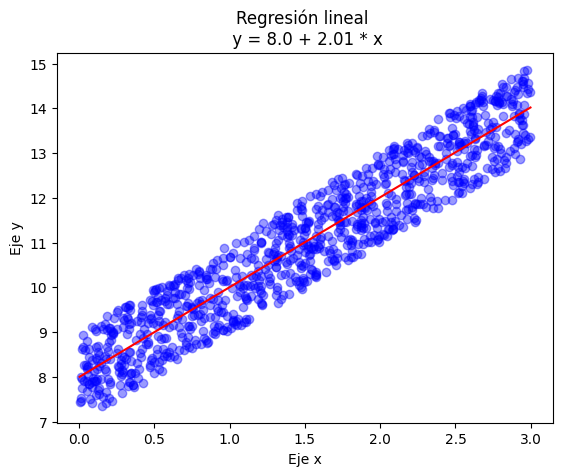

In [34]:
reglineal = regressionLineal("simulado", 1000)
reglineal.graficar_recta_ajuste()


### 2.2 Regresión Polinomial (25 puntos)

0 ptos Cargue la base de datos adjunta a la actividad (measurements.csv).

5 ptos Mediante Matplotlib o seaborn visualizar las variables contenidas en la base de datos con un
scatter plot.

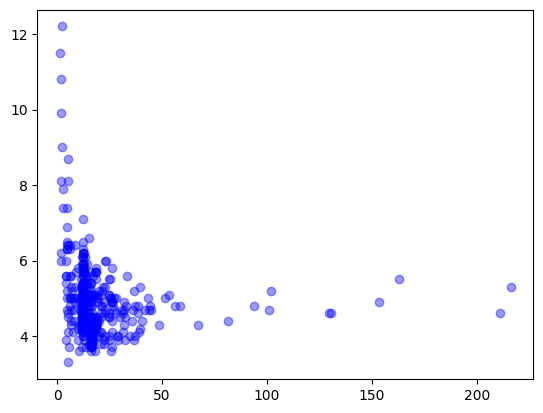

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values


plt.scatter(x, y, color='blue', alpha=0.4)
plt.show()


5 ptos Use la regresión lineal previamente implementada para predecir el consumo (consume) mediante la
distancia recorrida (distance). Se recomienda usar la clase previamente implementada regressionLineal,
sin embargo, también se permite usar funciones aisladas. El uso de métodos disponibles en sklearn
también está permitido pero se evaluará con la mitad del puntaje asignado a este item.


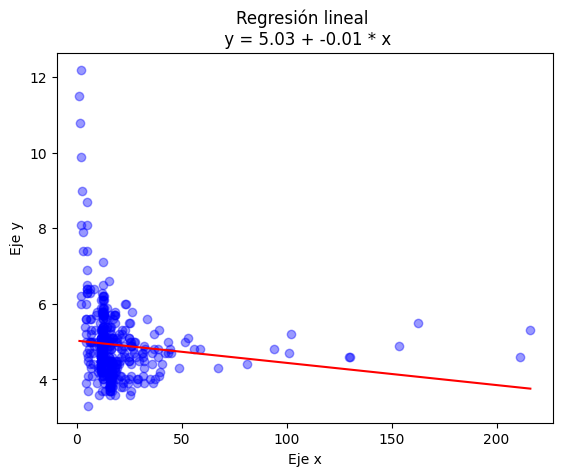

In [36]:
tamaño = df["distance"].shape[0]

reglineal = regressionLineal("real", tamaño, x, y)
reglineal.graficar_recta_ajuste()


5 ptos Genere una transformación polinomial de la variable independiente, para esta transformación se
recomienda utilizar el método disponible por sklearn preprocessing.PolynomialFeatures.

Para este resultado lo saque del video de [Polynomial Regression for Machine Learning](https://www.youtube.com/watch?v=Q8UfQ_aoCeQ&list=PLq6kDSGyUJS511jXM4M-BxVXx9bpsCIRi&index=82)  Ver min. 13:14

También ver la documentación de [scikit-learn.org Polymonial Features](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


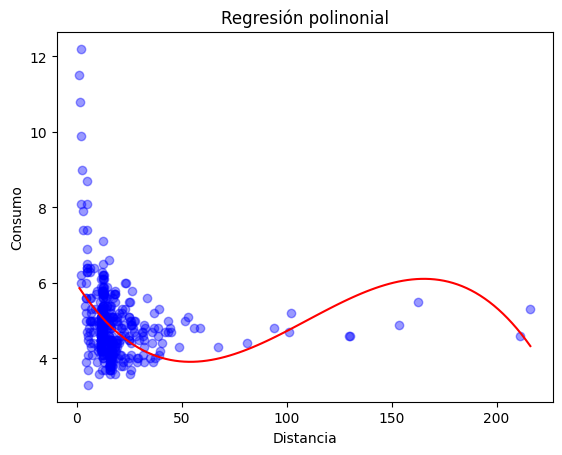

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values

X = x.reshape(-1, 1)  # se cambia a matriz de una sola columna sino sale error

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

modelo = LinearRegression()
modelo.fit(X_poly, y)

# predice los valores según el modelo de regresión polinomial
x_linea = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
y_linea = modelo.predict(poly.transform(x_linea))

plt.scatter(X, y, color='blue', alpha=0.4)
plt.plot(x_linea, y_linea, color='red')
plt.title("Regresión polinonial")
plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.show()

5 ptos Ajuste regresiones polinomiales de diferentes grados.

5 ptos Grafique los modelos resultantes, ¿Qué observa en el error cuadrático medio y en la forma de las
predicciones a medida que aumenta el grado del polinomio?

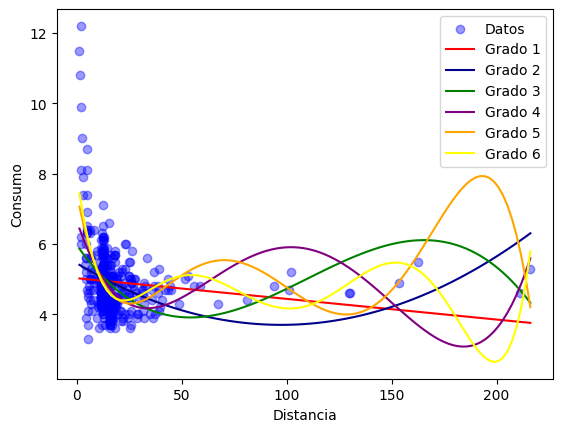

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values

X = x.reshape(-1, 1)  # se cambia a matriz de una sola columna 

def calcular_polinomial(grado, x, y):
    
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(x)

    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # predice los valores según el modelo de regresión polinomial
    x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
    y_linea = modelo.predict(poly.transform(x_linea))
    # print(modelo.intercept_, modelo.coef_) # intercepto y coeficientes para calcular la ecuación...
    return x_linea, y_linea

polinomio = {}
for i in range(1, 14):
    polinomio[i] = calcular_polinomial(i, X, y)
    
plt.scatter(X, y, color='blue', alpha=0.4)
colores = ['red', 'darkblue', 'green', 'purple', 'orange', 'yellow']

# colores = ['red', 'darkblue', 'green', 'purple', 'orange', 'yellow', 'black', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'olive']

for i in range(1, 7):
    plt.plot(polinomio[i][0], polinomio[i][1], color=colores[i-1])

plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos", "Grado 1", "Grado 2", "Grado 3", "Grado 4","Grado 5", "Grado 6"])
# plt.legend(["Datos", "Grado 1", "Grado 2", "Grado 3", "Grado 4","Grado 5", "Grado 6",  "Grado 7", "Grado 8", "Grado 9", "Grado 10", "Grado 11", "Grado 12", "Grado 13"])
plt.show()


**Respuesta:** Observamos que a mayor grado la curva se asemeja a una onda, lo que fluctua entre altos y bajos. Creemos que es el grado 6 el que más se acomoda a la realidad de los datos sin tanto ruido (color amarillo). Pero probamos otros grados que se vió como Overfitting. 

El grado 1, es la misma línea de la regresión lineal como el ejemplo anterior con nuestra clase creada, seríaun Underfitting. 

En conclusión el Good fit = grado 6 dado que tiene menor distancia del dato a la linea, mínima de errores cuadráticos, sólo se vé por inspección gráfica. 

### 2.3 Regresión con Penalización (bonus 10 puntos)

2.5 ptos Separe la base de datos en una para ajustar el modelo y otra para testearlo (80%-20%).

Para esto usamos el módulo **from sklearn.model_selection import train_test_split** ver video en [aquí](https://www.youtube.com/watch?v=SjOfbbfI2qY) donde lo explica.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

usamos el random_state = 13 por poner un número que estemos de acuerdo en el grupo


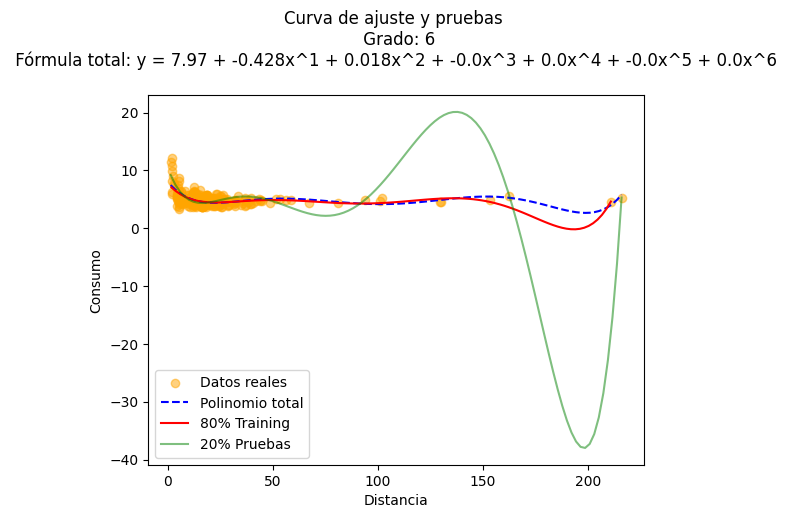

Curva de ajuste y pruebas 
 Grado: 6
 Fórmula total: y = 7.97 + -0.428x^1 + 0.018x^2 + -0.0x^3 + 0.0x^4 + -0.0x^5 + 0.0x^6 

Fórmula Trainig: y = 7.66 + -0.39x^1 + 0.017x^2 + -0.0x^3 + 0.0x^4 + -0.0x^5 + 0.0x^6 
Fórmula Test: y = 10.37 + -0.989x^1 + 0.057x^2 + -0.001x^3 + 0.0x^4 + -0.0x^5 + 0.0x^6 


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)  # x se cambia a matriz de una sola columna

# divide los datos 80%/20% de forma aleatoria donde el 20% será para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


def calcular_polinomial(grado, x, y):
    
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(x)

    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # predice los valores según el modelo de regresión polinomial
    x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
    y_linea = modelo.predict(poly.transform(x_linea))
    # Obtener los coeficientes (thetas) y el intercepto para visualizar al ecuación
    coefs = modelo.coef_
    intercepto = modelo.intercept_
    
    return x_linea, y_linea, intercepto, coefs

def imprimir_formula (intercepto, coefs):
    formula = f"y = {intercepto.round(2)} "
    # para cada uno de los coefs, es decir los thetas o x^n el coef[0] = 0.0
    for i in range(1, len(coefs)):
        formula += f"+ {coefs[i].round(3)}x^{i} "
    return formula

grado = 6
polinomio_ajuste = calcular_polinomial(grado, X_train, y_train)
polinomio_test = calcular_polinomial(grado, X_test, y_test)
polinomio_total = calcular_polinomial(grado, X, y)

titulo = "Curva de ajuste y pruebas \n Grado: " + str(grado) + "\n Fórmula total: " + imprimir_formula(polinomio_total[2], polinomio_total[3])+"\n"
tit_test = "Fórmula Test: " + imprimir_formula(polinomio_test[2], polinomio_test[3])
tit_ajuste = "Fórmula Trainig: " + imprimir_formula(polinomio_ajuste[2], polinomio_ajuste[3])

plt.scatter(X, y, color='orange', alpha=0.5)
plt.plot(polinomio_total[0], polinomio_total[1], color='blue', ls="--")
plt.plot(polinomio_ajuste[0], polinomio_ajuste[1], color='red')
plt.plot(polinomio_test[0], polinomio_test[1], color='green', alpha=0.5)

plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos reales","Polinomio total", "80% Training", "20% Pruebas"])
# plt.text(-100,-52, tit_test, fontsize=10, color='green')
# plt.text(-100,-55, tit_ajuste, fontsize=10, color='red')
plt.title(titulo)
plt.show()
print(titulo)
print(tit_ajuste)
print(tit_test)


#### Observación importante

Después de visualizar el gráfico, donde imprimirmos la fórmula, nos damos cuenta que el theta de los grados 4,5,6 son cercanos a ceros. Podríamos pensar que el mejor modelo sería hasta el grado 3.

OBS: 

Lo cambiamos a grado 3 para nuestras pruebas, y la curva nos da mucho mas similar las de testing con las de training. 

### Siguiendo con enunciado de la Actividad 2
2.5 ptos Utilizando la misma base de datos y una transformación polinomial de grado mayor a 5, ajuste en los datos de entrenamiento regresión Ridge y Lasso (from sklearn.linear model import Lasso, Ridge).

**Respuesta:**

Lo hiciemos viendo este video de Modelo Lasso para Regresión Lineal, pero tomando los valores de regresión polimonial Ver este video [aquí](https://www.youtube.com/watch?v=LmpBt0tenJE&list=PLq6kDSGyUJS511jXM4M-BxVXx9bpsCIRi&index=82) min. 6:28

También viendo este vidio de Lasso Regression [link](https://www.youtube.com/watch?v=7yydPgvrj6E) min 6:00

Calificación de Lasso: 0.02877714130947706
Calificación de Ridge: 0.028624311046351103


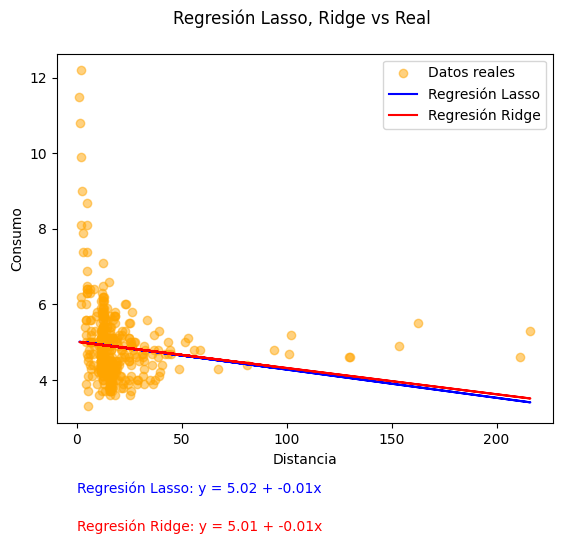

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso, Ridge

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)  

# divide los datos 80%/20% de forma aleatoria donde el 20% será para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


# de aplica Regresiones con penalización Lasso (L1) valor abs. --> 0 a los valores de entrenamiento 80%  train
########### Crear el modelo Lasso y entrenar el modelo con el fit
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
l_score = lasso.score(X_train, y_train) # lasso.score debe ser cercano a 1, para el mejor alpha
# probé a mano varios alpha, y este es el que más se acerca a 1 el l_score, pero varia muy poco
print("Calificación de Lasso:", l_score)
# predice los valores de prueba
y_pred_l = lasso.predict(X_test)
# Obtener los coeficientes (thetas) y el intercepto para visualizar al ecuación
intercept_l = lasso.intercept_
coefs_l = lasso.coef_
titulo_lasso = f"Regresión Lasso: y = {intercept_l.round(2)} + {coefs_l[0].round(2)}x"  # regresión lineal toma el primer coeficiente
########### Ridge
ridge = Ridge(alpha=10000).fit(X_train, y_train)
y_pred_r = ridge.predict(X_test)
r_score = ridge.score(X_train, y_train)
print("Calificación de Ridge:", r_score)
intercept_r = ridge.intercept_
coefs_r = ridge.coef_
titulo_rigde = f"Regresión Ridge: y = {intercept_r.round(2)} + {coefs_r[0].round(2)}x" 

plt.scatter(X, y, color='orange', alpha=0.5)
plt.plot(X_test, y_pred_l, color='blue')
plt.plot(X_test, y_pred_r, color='red')
plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos reales","Regresión Lasso", "Regresión Ridge"])
plt.title("Regresión Lasso, Ridge vs Real \n" )
plt.text(0,1, titulo_lasso, fontsize=10, color='blue')
plt.text(0,0, titulo_rigde, fontsize=10, color='red')
plt.show()


2.5 ptos Modifique el parámetro de penalización y obtenga los valores de los parámetro y grafique las
predicciones ¿Qué puede comentar al respecto? ¿Qué ocurre al aumentar el valor de alfa (penalización)
en cada modelo?¿qué diferencia se observa entre Ridge y Lasso?.

**Respuesta:** No veo diferencias entre las dos regressiones de Lasso vs Ridge, ambas son lineales, y tienen el mismo intercepto y coef. Prové con varios Alphas. 


2.5 ptos Seleccione el modelo adecuado de acuerdo al error cuatrático medio.

**Respuesta:**  Incluso aquí me da los mismos valores de errores cuatrático medio. 

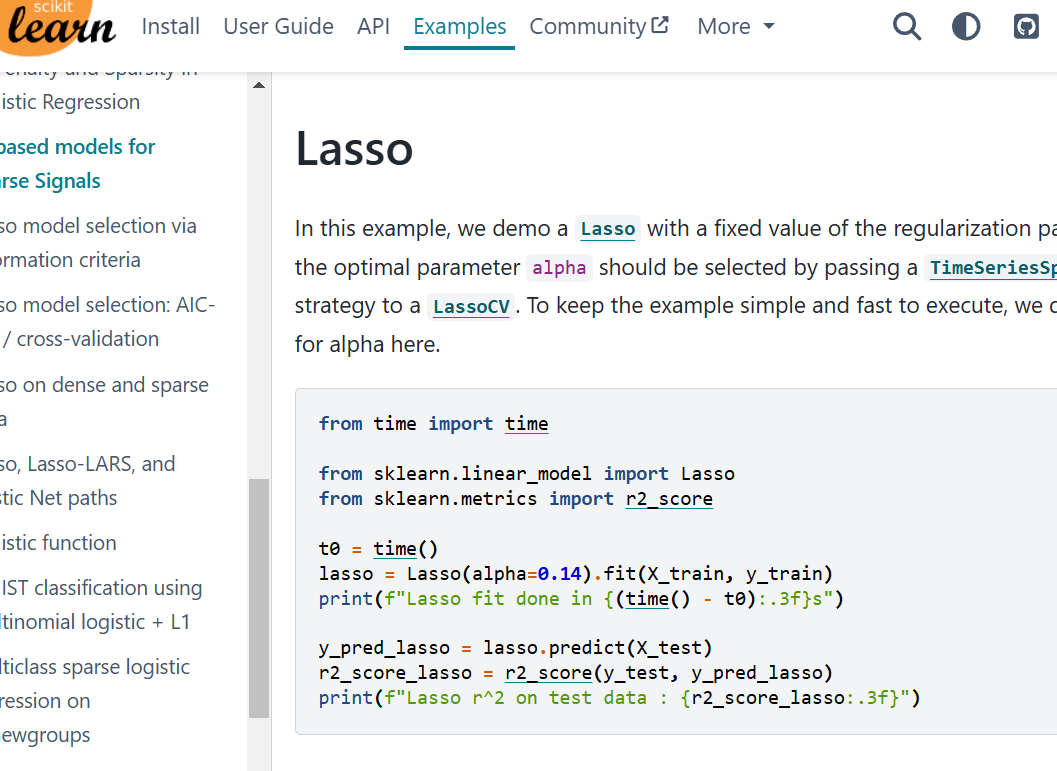

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# se calculan alugunas métricas errores de la predicción se compara la predicción con los valores de prueba
# ######  Lasso
error_abs_medio_l = mean_absolute_error(y_test, y_pred_l)
error_cuadratico_medio_l = mean_squared_error(y_test, y_pred_l)
r2_l = r2_score(y_test, y_pred_l)

# ######  Rigde
error_abs_medio_r = mean_absolute_error(y_test, y_pred_r)
error_cuadratico_medio_r = mean_squared_error(y_test, y_pred_r)
r2_r = r2_score(y_test, y_pred_r)

# lo puse en un dataframe para que se vea mejor
pd_s = pd.DataFrame({
    "Modelo": ["Lasso", "Ridge"], 
    "Error Abs. Medio": [error_abs_medio_l, error_abs_medio_r], 
    "Error Cuadr. Medio": [error_cuadratico_medio_l, error_cuadratico_medio_r], 
    "R2_Scope": [r2_l, r2_r]})
pd_s

,Modelo,Error Abs. Medio,Error Cuadr. Medio,R2_Scope
0,Lasso,0.898643,2.126209,-0.019357
1,Ridge,0.895799,2.122113,-0.017394


## DE NUEVO HAGO LA REG LASSO

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)  

# divide los datos 80%/20% de forma aleatoria donde el 20% será para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# entrenar el modelo
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lasso.predict(X_test)
# imprimir metricas de errores
print('Error Absoluto Medio::', mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio::', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Error Absoluto Medio:: 0.8858399689678299
Error Cuadrático Medio:: 2.111499815341434
R2: -0.012305145189660749


In [109]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]} # valores de alpha a probar
lasso_cv = GridSearchCV(lasso, param_grid, cv=3, n_jobs=-1) # cross validation de 3 folds
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [122]:
y_pred2 = lasso_cv.predict(X_test)
# imprimir metricas de errores
print('Error Absoluto Medio::', mean_absolute_error(y_test, y_pred2))
print('Error Cuadrático Medio::', mean_squared_error(y_test, y_pred2))
print('R2:', r2_score(y_test, y_pred2))

Error Absoluto Medio:: 0.8974485293004734
Error Cuadrático Medio:: 2.1244277868175128
R2: -0.0185031339117121


In [123]:
lasso_cv.best_estimator_ # mejor valor de alpha

Lasso(alpha=0.1)

In [125]:
lasso_mejor = Lasso(alpha=0.1)
lasso_mejor.fit(X_train, y_train)

Lasso(alpha=0.1)

In [127]:
y_pred2 = lasso_mejor.predict(X_test)
l_incept = lasso_mejor.intercept_ # intercepto
l_coef = lasso_mejor.coef_ # coeficientes de las variables
titulo = f"y = {l_incept:.2f} " # string para el titulo
for i in range(len(l_coef)):
    titulo += f"+ {l_coef[i]:.2f} * x^{i+1} "
print(titulo)
# imprimir coeficientes en un dataframe
df_mejor = pd.DataFrame(l_coef, index=['theta'], columns=['Coeficiente'])
df_mejor


y = 5.02 + -0.01 * x^1 


,Coeficiente
theta,-0.007258


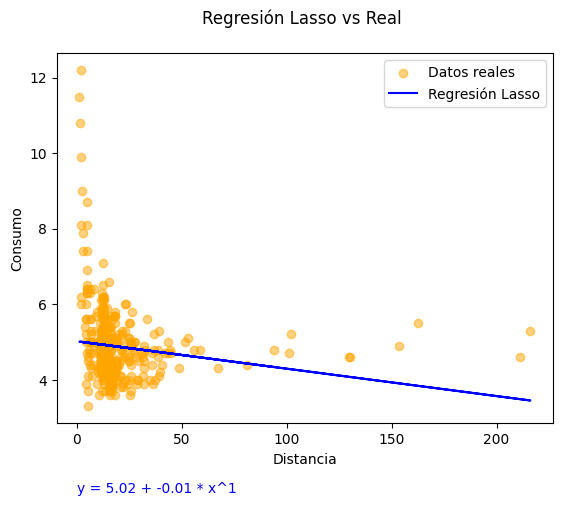

In [128]:
plt.scatter(X, y, color='orange', alpha=0.5)
plt.plot(X_test, y_pred2, color='blue')
plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos reales","Regresión Lasso"])
plt.title("Regresión Lasso vs Real \n" )
plt.text(0,1, titulo, fontsize=10, color='blue')
plt.show()

## ME DA EL MISMO MODELO DE ARRIBA, ES DECIR, LA MISMA CURVA, Y ESTO QUE USE EL GridSearchCV PARA OBTENER EL MISMO ESTIMADOR.